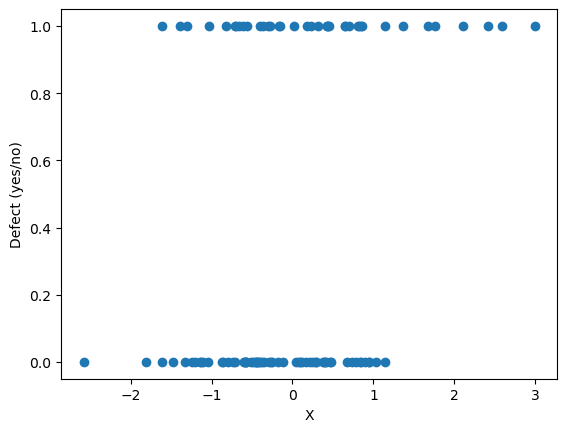

In [6]:
# Simulating the problem.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm
from scipy.special import expit

np.random.seed(seed=233423)
N = 100
X = norm.rvs(size=N, loc=0, scale=1)

alpha = -0.4
beta = 0.7
prob = expit(alpha + beta * X)

Y = binom.rvs(n=1, p=prob)

plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Defect (yes/no)")
plt.show()

In [10]:
import pystan

model = pystan.stan(model_code="""
data {
    int N;
    real X[N];
    int Y[N];
}

parameters{
    real alpha;
    real beta;
}

model{
 for(n in 1:N){
   Y[n] ~ bernoulli_logit(alpha + beta * X[n]);
 }
}
""", data={"N": N, "Y": Y, "X": X})

#post = model.sample(num_chains=4, num_samples=1000)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_63929464b704deb0a7e9ffa08ef076e1 NOW.


AttributeError: 'stanfit4anon_model_63929464b704deb0a7e9ffa08ef076e' object has no attribute 'sample'

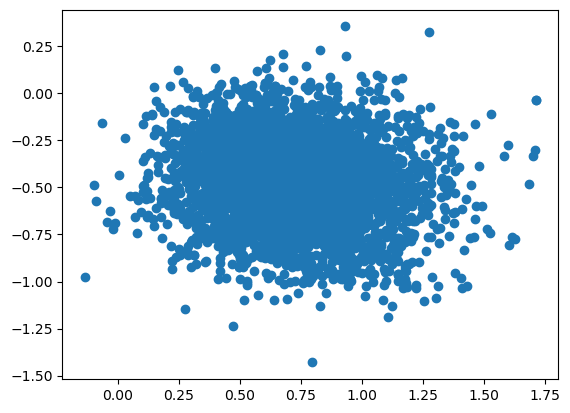

In [16]:
posterior = model.extract()

plt.scatter(posterior["beta"],posterior["alpha"])